# ARIMA and Seasonal ARIMA

Autoregressive Integrated Moving Averages

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df=pd.read_csv('champane.csv')
df

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [9]:
df.tail(5)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [10]:
df.columns=['Month','Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [11]:
## drop last 2 columns
df.drop(106,inplace=True,axis=0)

In [12]:
df

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [13]:
df.drop(105,axis=0,inplace=True)

In [14]:
df

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [16]:
df['Month']=pd.to_datetime(df['Month'])
df

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
...,...,...
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0


In [17]:
df.set_index('Month',inplace=True)
df

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [18]:
df.isnull().sum()

Sales    0
dtype: int64

In [19]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<AxesSubplot:xlabel='Month'>

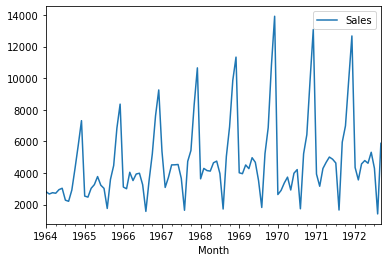

In [22]:
df.plot()

In [25]:
##test for stationarity

from statsmodels.tsa.stattools import adfuller

In [26]:
test_results=adfuller(df['Sales'])

In [30]:
#H0 : it is non stationary
#H1 : it is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    label=['ADF test statistic','p-value','#lags used','No of observations used']
    for value,label in zip(result,label):
        print(label+' :'+str(value))
    if result[1] <=.05:
        print('strong evidence against null hypothesis(H0), reject null hypothesis, Data has no unit root and is stationary')
    else:
        print('weak evidence against null hypothesis,time seies has a unit root ,indicating it as non-stationary')

In [31]:
adfuller_test(df['Sales'])

ADF test statistic :-1.8335930563276186
p-value :0.36391577166024713
#lags used :11
No of observations used :93
weak evidence against null hypothesis,time seies has a unit root ,indicating it as non-stationary


In [34]:
df['Sales First Difference']=df['Sales']-df['Sales'].shift(1)
df

,Sales,Sales First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0
...,...,...
1972-05-01,4618.0,-170.0
1972-06-01,5312.0,694.0
1972-07-01,4298.0,-1014.0


In [41]:
df['Seasonal first difference']= df['Sales']-df['Sales'].shift(12)
df.head(13)

,Sales,Sales First Difference,Seasonal first difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [37]:
## Again test dickey-fuller test
adfuller_test(df['Seasonal first difference'].dropna())

ADF test statistic :-7.626619157213164
p-value :2.060579696813685e-11
#lags used :0
No of observations used :92
strong evidence against null hypothesis(H0), reject null hypothesis, Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

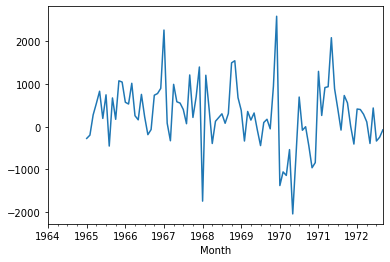

In [38]:
df['Seasonal first difference'].plot()

# Auto Regressive Model

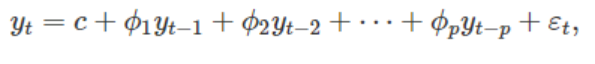

# Final Thoughts on Autocorrelation and Partial Autocorrelation

Identification of an AR model is often best done with the PACF.
-      For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in          theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero              partial utocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme              lag of x that    is used as a predictor.


Identification of an MA model is often best done with the ACF rather than the PACF.

-    For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer              pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q p AR model lags d differencing q MA lags

In [44]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

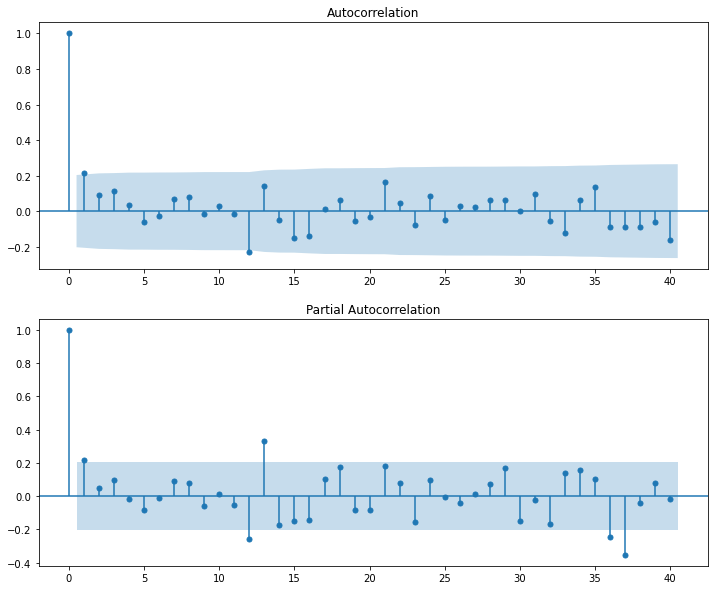

In [48]:
fig=plt.figure(figsize=(12,10))
ax1=fig.add_subplot(211)
fig =plot_acf(df['Seasonal first difference'].dropna(),lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(df['Seasonal first difference'].dropna(),lags=40,ax=ax2)

In [49]:
# for non seasonal data
# p=1,q=1,d=1
from statsmodels.tsa.arima_model import ARIMA

In [53]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\Vineet Roy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Vineet Roy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [54]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.263
Date:                Sat, 20 Nov 2021   AIC                           1910.251
Time:                        13:10:16   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7843     12.405      1.837      0.066      -1.530      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [58]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\Vineet Roy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Vineet Roy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [59]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Sat, 20 Nov 2021   AIC                           1486.804
Time:                                    13:16:50   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.61   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

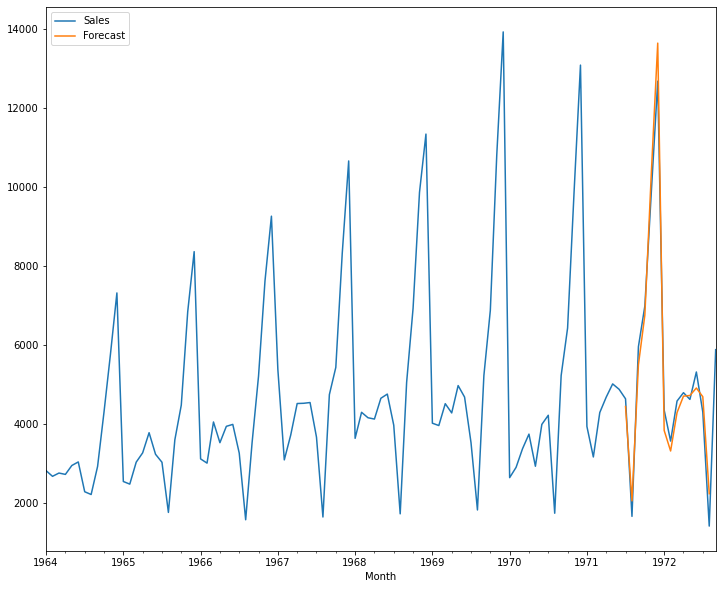

In [63]:
df['Forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','Forecast']].plot(figsize=(12,10))

In [65]:
from pandas .tseries.offsets import DateOffset
future_dates=[df.index[-1]+DateOffset(months=x)for x in range(0,24)]

In [66]:
future_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [69]:
future_df.tail()

,Sales,Sales First Difference,Seasonal first difference,Forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [70]:
future_data=pd.concat([df,future_df])

<AxesSubplot:>

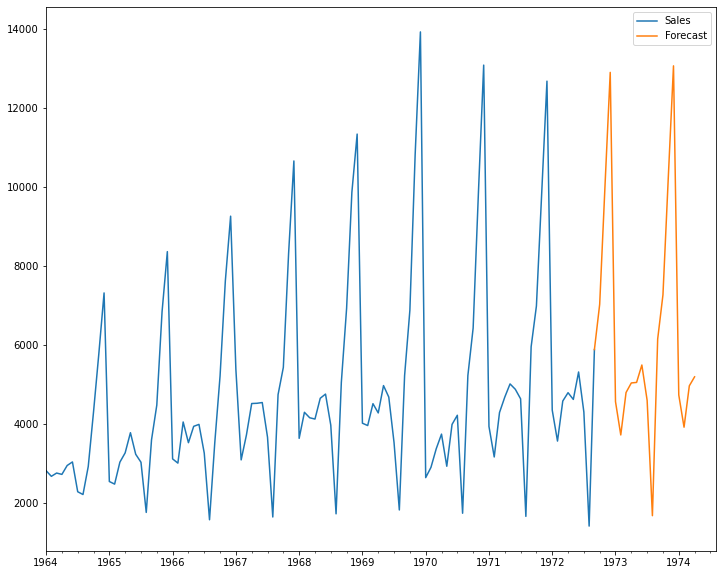

In [71]:
future_data['Forecast']=results.predict(start=104,end=123,dynamic=True)
future_data[['Sales','Forecast']].plot(figsize=(12,10))